# Neural Network from scratch

Importing libraries

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [30]:
# Load the training and testing datasets
train_data = pd.read_csv('ds2_train.csv')
test_data = pd.read_csv('ds2_test.csv')

In [31]:
train_data.head()

,x_1,x_2,y
0,3.759481,7.507940,0.0
1,3.422057,4.991203,0.0
2,2.778818,4.112071,0.0
3,4.018066,5.653732,0.0
4,1.806062,4.685966,0.0


2 input features x_1 and x_2 and 1 output label y

clearly due to such less number of parameters the neural network will be simple

Y can either take up 0 or 1 values. Hence binary classified outputs. 

so let us have one hidden layer only, as the complexity of the problem isnt that high. We choose the activations of the hidden layer to be ReLU instead of linear activations for faster speeds, efficiency and most simplistic output that it provides. 

The output layer will have only one neuron with a logistic or sigmoid activation since the neural network we need is a binary classifier

We can play around and choose the number of neurons for the hidden layer as you will see later in the code. the code is made so that i can adjust the number of neurons in the hidden layer.

Now that the structure of the neural network i have coded has been discussed an the intuition behind it, lets see the next blocks of code.

I will insert a rough image ive annotated to explain the thought of how this actually represents below

![](onenote_nn_drawing.png)

* the input layer has 2 neurons which indicate the 2 input features x1 and x2
* the purple connections betweent the input layer and the 1st and only hidden layer(shown in yellow box) are having weights denoted by W1 and biases b1
* the hidden layer shown in yellow has n neurons which we will be able to set in code as we will see the in the code later on
* the activations of the neurons of the hidden layer have been set to relu activation for its efficiency
* the hidden layer is then connected to the output layer with the pink colored connections
* these connections have their weights and biases denoted by the ndarrays W2 and b2
* the output layer has a single neuron of the logistic or sigmoid activation since the neural network will be a binary classifier as seen.
* the forward prop direction is from the input layer towards the output layer to calculate and set the activations and z1 or modulated inputs(inputs modulated by the connection weights and biases)
* backprop is done from the output layer towards the input layer to get the gradients
* then these are put in the gradient descent's first iteration to optimise and update the weights and biases
* the forward and back prop are done in such a manner again and again with newer and newer values of weights and biases set by the gradient descent until convergence is achieved or until the number of gradient descent iterations are exhausted

In [32]:
# Extract features and labels from the datasets
X_train = train_data[['x_1', 'x_2']].values.T
Y_train = train_data['y'].values.reshape(1, -1)
X_test = test_data[['x_1', 'x_2']].values.T
Y_test = test_data['y'].values.reshape(1, -1)

In the block above, labels and features of test and train dataset are stored into different arrays

In [33]:
# Defining activation functions
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [34]:
# Initialize parameters function
def initialize_params(input_size, hidden_size, output_size):
    W1 = np.random.rand(hidden_size, input_size) - 0.5
    b1 = np.random.rand(hidden_size, 1) - 0.5
    W2 = np.random.rand(output_size, hidden_size) - 0.5
    b2 = np.random.rand(output_size, 1) - 0.5
    return W1, b1, W2, b2

We initialise the weights and biases of the connections between the layers in the code block above.

We subtract 0.5 for a good reason. Actually np.random.rand gives values between 0 and 1 at random. Now the subtraction changes the range of weights and biases from -0.5 to +0.5 which sets all weights and biases to small values near to zero. 

If the initial weights are too large, it can lead to exploding gradients, causing slow convergence. But if the initial weights are too small, it can lead to vanishing gradients, where the gradients become extremely small, and the network fails to learn effectively.

These intial values will keep getting updated and optimised by gradient descent as we will see later

In [35]:
# Implement forward propagation function
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

The updates of forward prop are defined in the forward prop function as shown above

As we know, in forward proagation, the input from the outer layer A is linearly modified using the connection weights and biases W and b in order to create a new parameter Z. This Z is passed to the activation function (can be sigmoid, relu, linear, softmax,etc.) of the neurons of the layer and results in the activation outputs of the layer's neurons which serves as input for the next layer.

In [36]:
# Implement backward propagation function
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

The update rules of backward prop have been used in the backward prop function as shown above.

Backward prop udate rules unlike the forward prop rules, get updated in the opposite direction. The partial derivative of the error or cost function with respect to a layer's Z is used to calculate this the cost derivative with respect to the same layer's weights and bias (dW and db of that layer). These are outputted to the layer behind, where they serve as an input. These are used to get the derivative of the error with respect to the current layer's Z. this derivative is used to compute the dW and db of this layer which again are outputted to the layer before and so on. 

The backward prop hence allows us to easily calculate derivatives without complex methods being required to be used.

In [37]:
# Update parameters using gradient descent function
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

appling the gradient descent using its update rule on all the weights and biases is shown above

In [38]:
# Train model function definition by utilizing backprop 
def train_model(X, Y, hidden_size, output_size, num_epochs=1000, learning_rate=0.1):
    input_size = X.shape[0]
    W1, b1, W2, b2 = initialize_params(input_size, hidden_size, output_size)
    
    for epoch in range(num_epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if epoch % 100 == 0:
            cost = (-1 / X.shape[1]) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
            print(f"Epoch {epoch}/{num_epochs}, Cost: {cost:.4f}")
    
    return W1, b1, W2, b2

we utilise the functions previously defined to create the train model function as shown above which trains the neural network

The function will also print the cost every time more 100 ierations are crossed until number of iterations targeted is achieved

In [39]:
# Training the model
hidden_size = 10  # You can adjust the number of neurons in the hidden layer as per your requirement
output_size = 1 #as only 1 neuron of sigmoid type is required in output
num_epochs = 10000
learning_rate = 0.1

W1, b1, W2, b2 = train_model(X_train, Y_train, hidden_size, output_size, num_epochs, learning_rate)

Epoch 0/10000, Cost: 0.9343
Epoch 100/10000, Cost: 0.2397
Epoch 200/10000, Cost: 0.2097
Epoch 300/10000, Cost: 0.2049
Epoch 400/10000, Cost: 0.2032
Epoch 500/10000, Cost: 0.2023
Epoch 600/10000, Cost: 0.2017
Epoch 700/10000, Cost: 0.2014
Epoch 800/10000, Cost: 0.2012
Epoch 900/10000, Cost: 0.2010
Epoch 1000/10000, Cost: 0.2010
Epoch 1100/10000, Cost: 0.2009
Epoch 1200/10000, Cost: 0.2009
Epoch 1300/10000, Cost: 0.2009
Epoch 1400/10000, Cost: 0.2008
Epoch 1500/10000, Cost: 0.2008
Epoch 1600/10000, Cost: 0.2008
Epoch 1700/10000, Cost: 0.2008
Epoch 1800/10000, Cost: 0.2008
Epoch 1900/10000, Cost: 0.2008
Epoch 2000/10000, Cost: 0.2008
Epoch 2100/10000, Cost: 0.2008
Epoch 2200/10000, Cost: 0.2008
Epoch 2300/10000, Cost: 0.2008
Epoch 2400/10000, Cost: 0.2008
Epoch 2500/10000, Cost: 0.2008
Epoch 2600/10000, Cost: 0.2008
Epoch 2700/10000, Cost: 0.2008
Epoch 2800/10000, Cost: 0.2008
Epoch 2900/10000, Cost: 0.2008
Epoch 3000/10000, Cost: 0.2008
Epoch 3100/10000, Cost: 0.2008
Epoch 3200/10000, Co

In [40]:
# Make predictions on the test dataset
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.round(A2)

In [41]:
# Evaluate the model
def accuracy(Y_pred, Y_true):
    return np.mean(Y_pred == Y_true)

Y_pred_train = predict(X_train, W1, b1, W2, b2)
Y_pred_test = predict(X_test, W1, b1, W2, b2)

train_accuracy = accuracy(Y_pred_train, Y_train)
test_accuracy = accuracy(Y_pred_test, Y_test)

print(f"Train Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Train Accuracy: 91.50%
Test Accuracy: 90.00%


the above two blocks are self explanatory 

in the block below we plot the decision boundary found by the neural network

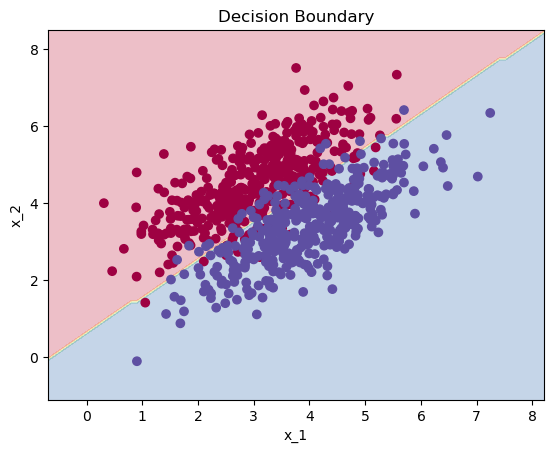

In [42]:
# Visualize the decision boundary
def plot_decision_boundary(X, Y, W1, b1, W2, b2):
    x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
    x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    grid = np.c_[xx1.ravel(), xx2.ravel()].T
    _, _, _, A2 = forward_propagation(grid, W1, b1, W2, b2)
    Z = np.round(A2).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, Y_train, W1, b1, W2, b2)

The accuracy achieved with a single hidden layer is already above 90% which is great. 

more ways to increase this accuracy can be by doing further data preprocessing or adding more hidden layers to the neural networks or hyperparameter tuning



## THANK YOU 